# 1. Based on the introductory lecture, write a Monte-Carlo that estimates the value of π 

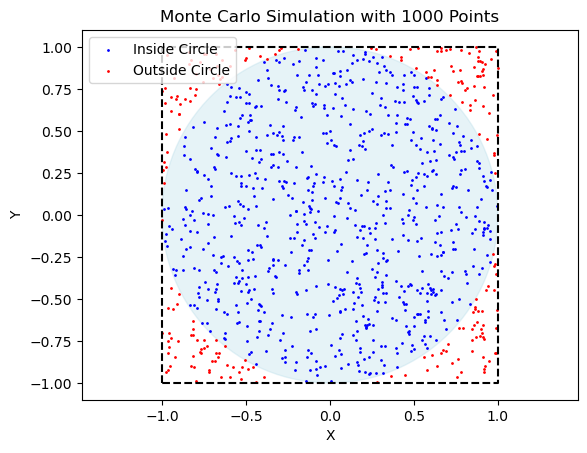

3.128

In [7]:
import random
import matplotlib.pyplot as plt

# degine Monte-Carol to estimate π
def estimate_pi(num_samples, plot_points=False):
    inside_circle = 0
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []
    
    for _ in range(num_samples):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1) #generate random points inthe given boundry
        #for points inside the circle
        if x**2 + y**2 <= 1: 
            inside_circle += 1
            if plot_points:
                x_inside.append(x)
                y_inside.append(y)
        #for points outside the circle        
        else:
            if plot_points:
                x_outside.append(x)
                y_outside.append(y)
    #area of circle is pi, square is 4, so number of points in the circle should be pi/4==> pi_estimate = 4 * (inside_circle / num_samples)
    pi_estimate = 4 * (inside_circle / num_samples)
    '''print(pi_estimate)'''
    # plot graph with the points
    if plot_points:
        fig, ax = plt.subplots()
        # plot circle
        circle = plt.Circle((0, 0), 1, color='lightblue', fill=True, alpha=0.3)
        ax.add_artist(circle)
        # plot square
        plt.plot([-1, -1, 1, 1, -1], [-1, 1, 1, -1, -1], color='black', linestyle='--')
        # plot points
        plt.scatter(x_inside, y_inside, color='blue', s=1, label='Inside Circle')
        plt.scatter(x_outside, y_outside, color='red', s=1, label='Outside Circle')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(f"Monte Carlo Simulation with {num_samples} Points")
        plt.legend()
        plt.axis("equal")  # keep x and y axis equal
        plt.show()
    
    return pi_estimate

# plot an example showing the distribution of the points, using small size of samples
estimate_pi(1000, plot_points=True)


# 2. Use your code to study the convergence of the estimate of π towards its true value as you increase the number of randoms used. Produce a plot demonstrating this.


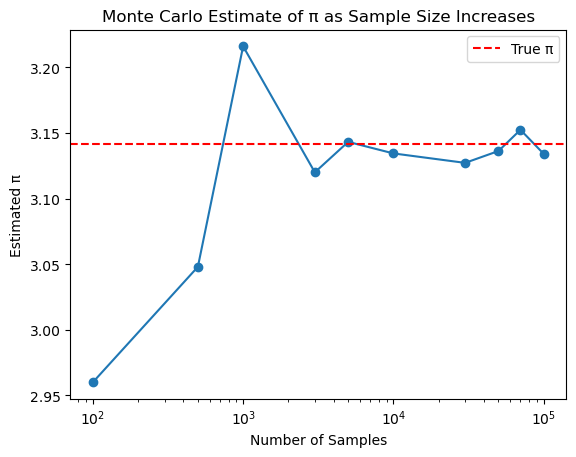

In [8]:


# plot Monte Carlo Estimate of π as Sample Size Increases(convergence of the estimation)
sample_sizes = [100, 500, 1000, 3000, 5000, 10000, 30000, 50000, 70000, 100000]
estimates = [estimate_pi(n) for n in sample_sizes]

plt.plot(sample_sizes, estimates, marker='o', linestyle='-')
plt.axhline(y=3.141592653589793, color='r', linestyle='--', label='True π')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated π')
plt.title('Monte Carlo Estimate of π as Sample Size Increases')
plt.legend()
plt.xscale('log')
plt.show()



# 3. Add a function to estimate the accuracy of the output as the number of randoms increases. It is possible to use sample variance to do this – why? 

In [16]:
import random
import numpy as np

def estimate_pi_with_variance(num_samples):
    inside_circle = 0
    pi_estimates = []
    
    for _ in range(num_samples):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
        # append current_pi_estimate 
        current_pi_estimate = 4 * (inside_circle / (_ + 1))
        pi_estimates.append(current_pi_estimate)
    
    mean_estimate = np.mean(pi_estimates)
    variance = np.var(pi_estimates)
    return mean_estimate, variance

# test set
#sample_sizes = [100, 500, 1000, 3000, 5000, 10000, 30000, 50000, 70000, 100000]
for s in sample_sizes:
    mean, variance = estimate_pi_with_variance(s)
    print("estimate:", f"{mean:.3f}")
    print("variance:", f"{variance:.5f}")


estimate: 3.389
variance: 0.07745
estimate: 3.164
variance: 0.01171
estimate: 3.181
variance: 0.00895
estimate: 3.131
variance: 0.00546
estimate: 3.082
variance: 0.00230
estimate: 3.110
variance: 0.00732
estimate: 3.163
variance: 0.00082
estimate: 3.133
variance: 0.00048
estimate: 3.135
variance: 0.00076
estimate: 3.141
variance: 0.00014


# 4. Use the function you have written to add error estimates to your plot. 

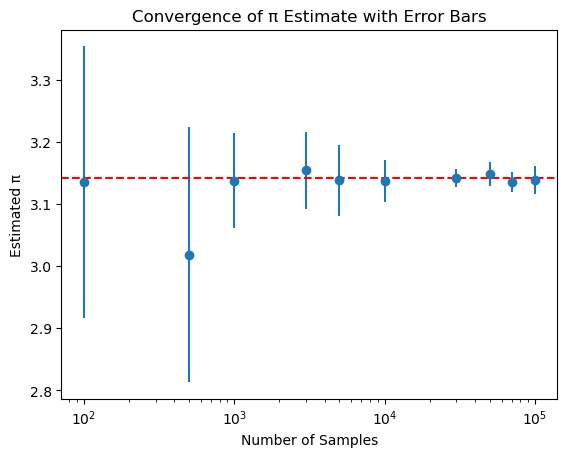

In [17]:
#create list
means = []
variances = []

#append value
for n in sample_sizes:
    mean, variance = estimate_pi_with_variance(n)
    means.append(mean)
    variances.append(variance)

#plot graph
plt.errorbar(sample_sizes, means, yerr=np.sqrt(variances), fmt='o')
plt.axhline(y=3.141592653589793, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated π')
plt.title('Convergence of π Estimate with Error Bars')
plt.show()


# 5. Next implement a root finding algorithm and use this to estimate π  
*bisection method
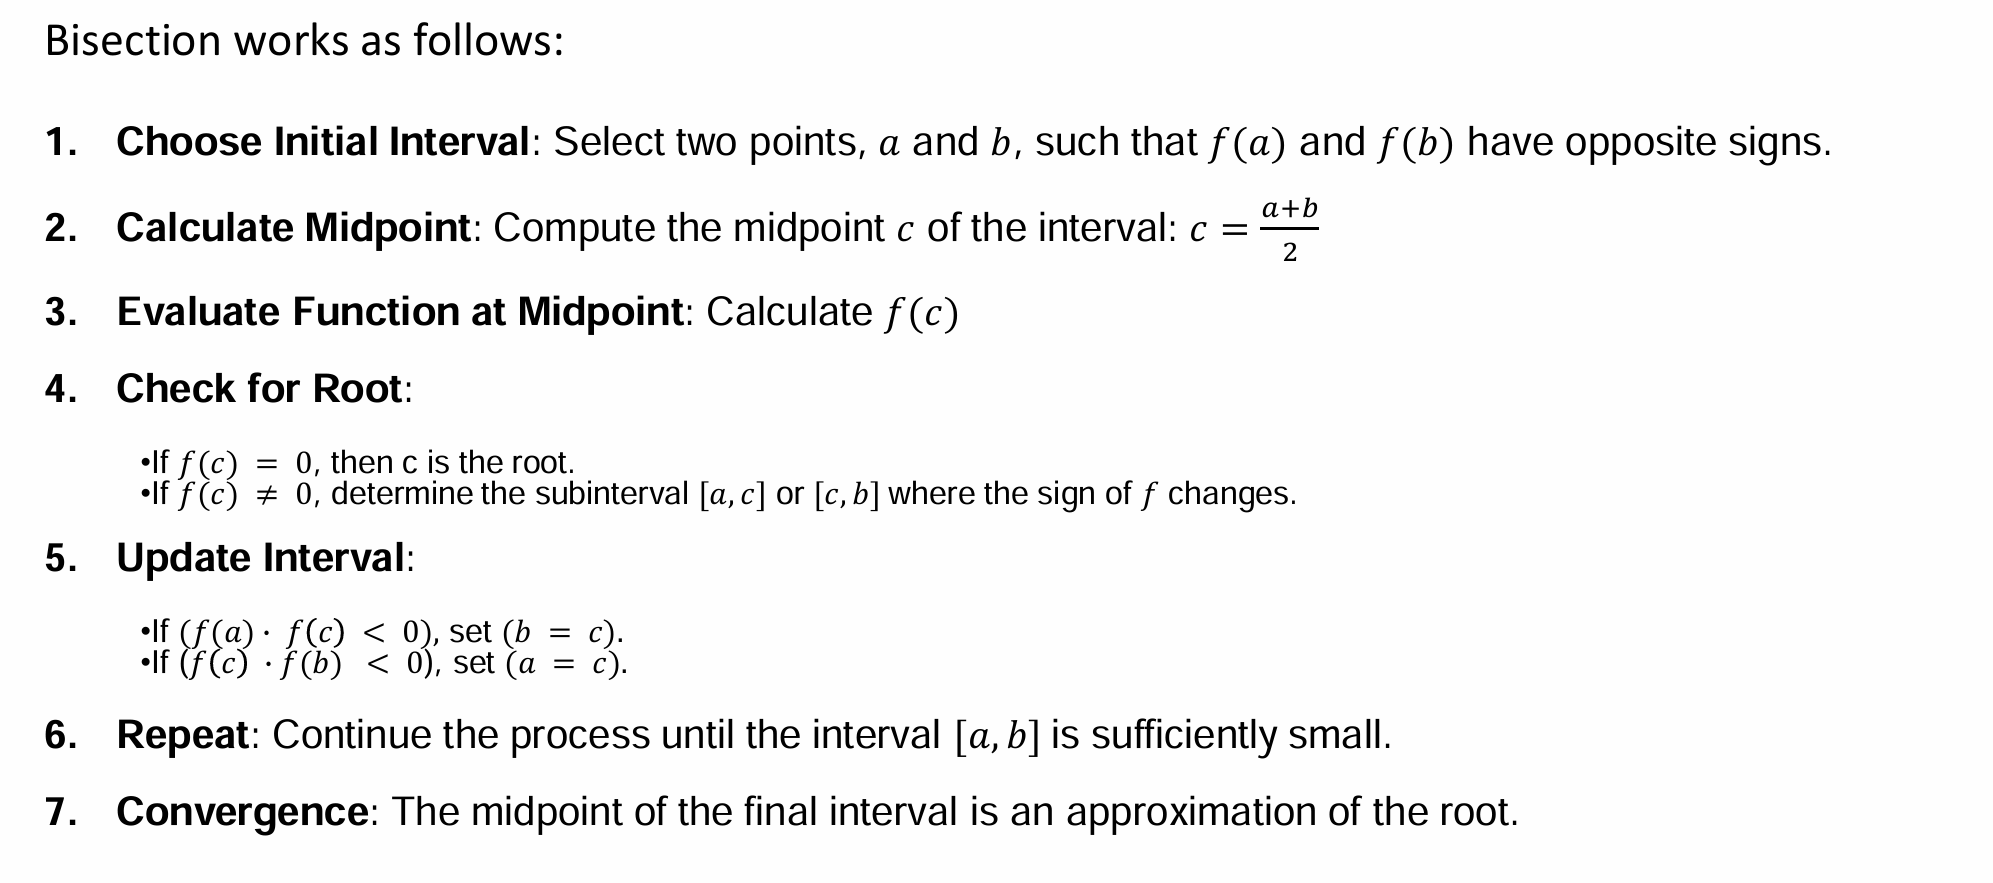
*Newton-Raphson Method
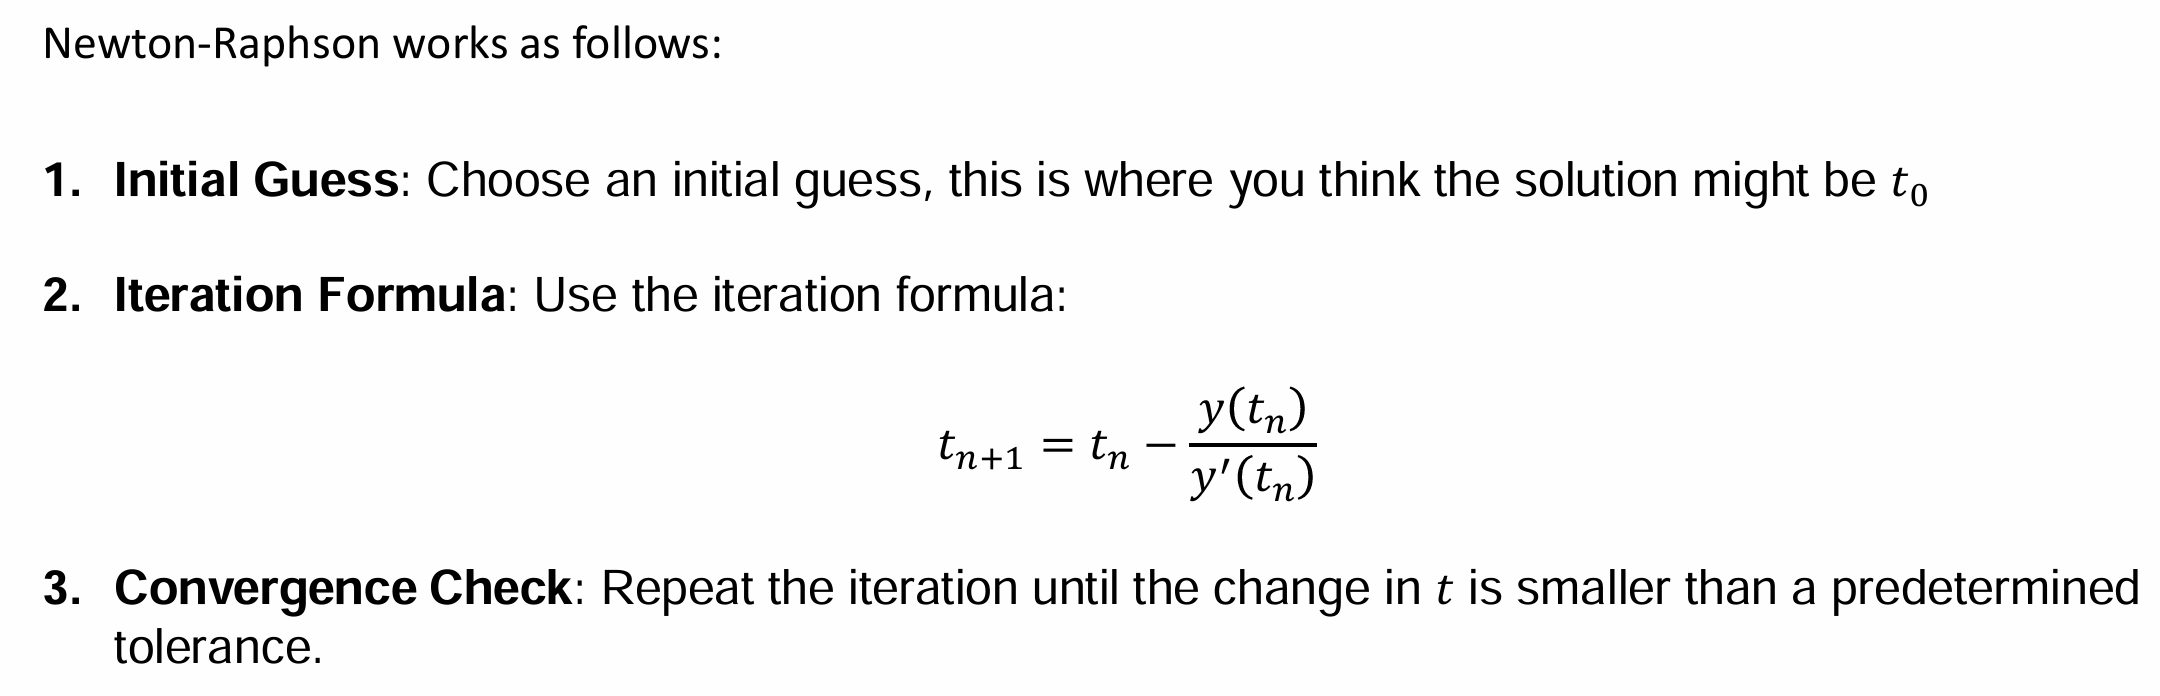

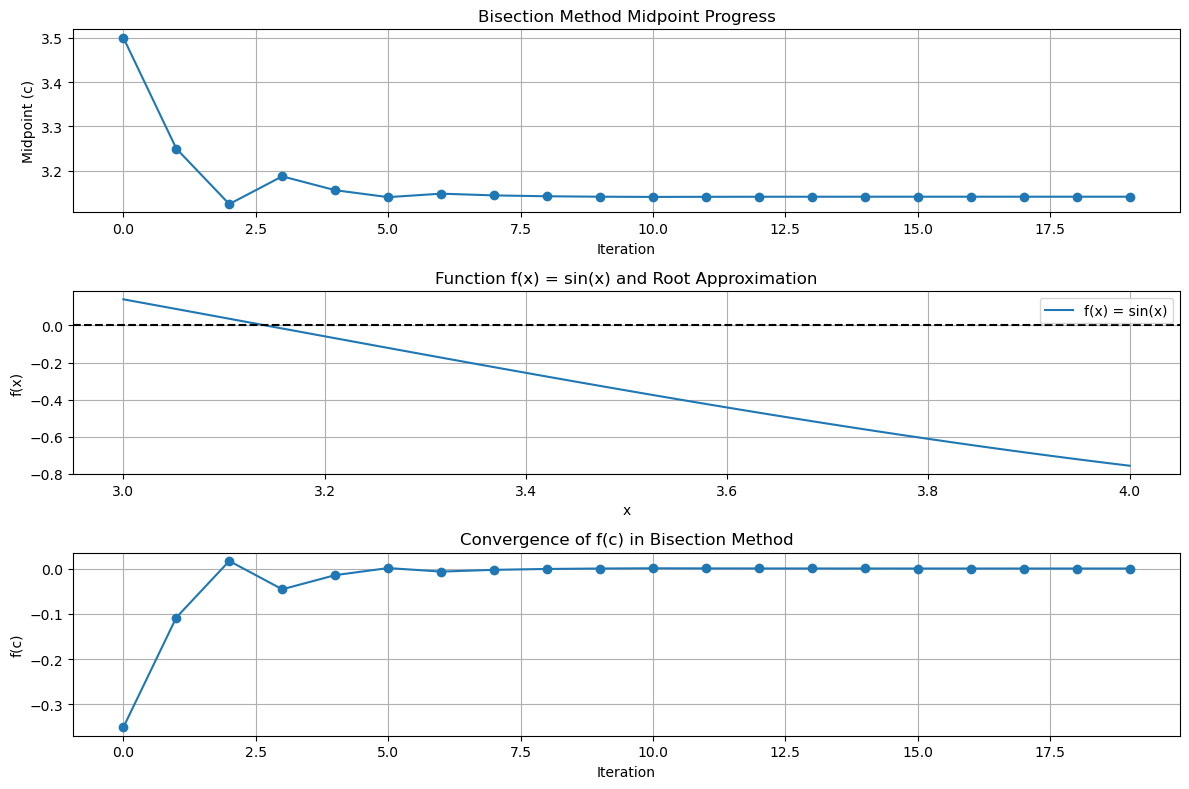

Estimated value of pi: 3.1415929794311523


In [1]:
#bisection method 
import numpy as np
import matplotlib.pyplot as plt

# define f(x) = sin(x)
def f(x):
    return np.sin(x)

# use bisection_method to find roots
def bisection_method(a, b, tol=1e-6, max_iter=100):
    midpoints = []
    values = []
    for _ in range(max_iter):
        c = (a + b) / 2
        midpoints.append(c)
        values.append(f(c))
        
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, midpoints, values
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, midpoints, values

# use bisection_method to estimate pi
a, b = 3, 4
pi_estimate, midpoints, values = bisection_method(a, b)

# draw converging graph for c
plt.figure(figsize=(12, 8))

# 1st graph：Bisection Method Midpoint Progress
plt.subplot(3, 1, 1)
plt.plot(range(len(midpoints)), midpoints, '-o')
plt.xlabel("Iteration")
plt.ylabel("Midpoint (c)")
plt.title("Bisection Method Midpoint Progress")
plt.grid(True)

# 2nd graph：Function f(x) = sin(x) and Root Approximation between 3-4
x_vals = np.linspace(a, b, 100)
plt.subplot(3, 1, 2)
plt.plot(x_vals, f(x_vals), label="f(x) = sin(x)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function f(x) = sin(x) and Root Approximation")
plt.legend()
plt.grid(True)

# 3rd：Convergence of f(c) in Bisection Method
plt.subplot(3, 1, 3)
plt.plot(range(len(values)), values, '-o')
plt.xlabel("Iteration")
plt.ylabel("f(c)")
plt.title("Convergence of f(c) in Bisection Method")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Estimated value of pi: {pi_estimate}")


# 6. How can you quantify the error for this technique? 

bisection method is to keep finding the midpoint of each iterations,
so the error must be <= (a-b)/2
so when the error is small, error should be close to f(c)

# 7. Now that you have implemented two methods, can you suggest a third method to estimate π 
- Leibniz Series

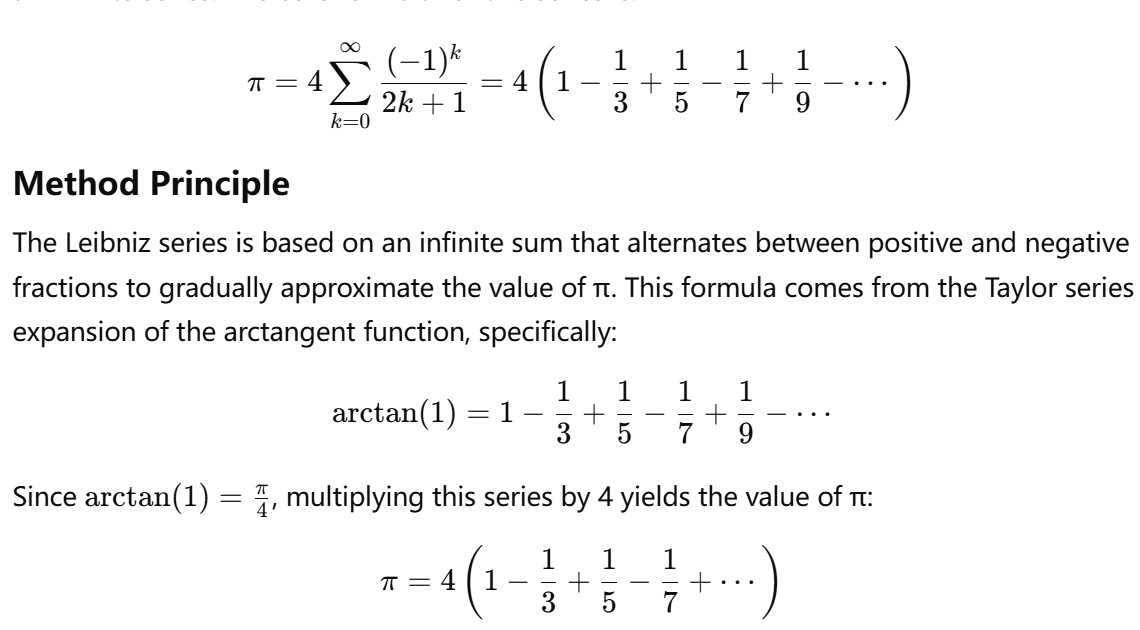

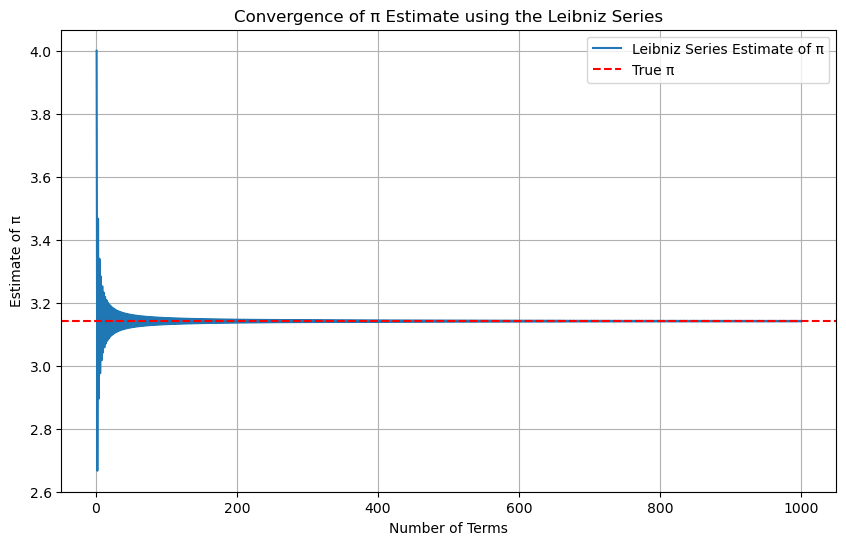

In [2]:
import matplotlib.pyplot as plt

def leibniz_series_pi(num_terms):
    """
    Estimate π using the Leibniz series and return the values at each term.
    
    Parameters:
    - num_terms: Number of terms to use in the series.
    
    Returns:
    - A list of π estimates based on the number of terms.
    """
    pi_estimate = 0
    estimates = []  # store the estimation of pi
    
    for k in range(num_terms):
        pi_estimate += (-1)**k / (2 * k + 1)
        estimates.append(pi_estimate * 4)  # result of every iteration * 4 ==> get the estimation of π 
    return estimates

# set number of terms
num_terms = 1000
pi_estimates = leibniz_series_pi(num_terms)

# plot Convergence of π Estimate using the Leibniz Series
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_terms + 1), pi_estimates, label="Leibniz Series Estimate of π")
plt.axhline(y=3.141592653589793, color='r', linestyle='--', label="True π")
plt.xlabel("Number of Terms")
plt.ylabel("Estimate of π")
plt.title("Convergence of π Estimate using the Leibniz Series")
plt.legend()
plt.grid(True)
plt.show()


# 8. Based on everything you have learned this week, which estimate is more reliable, which has the potential to be more accurate? Think about how the computer is generating the numbers of the values of functions that you are using. Think about the data types you are  using.  

## Comparing Methods for Estimating π

Based on the methods learned (Monte Carlo, Bisection, Leibniz Series, and Newton's Method), here’s a summary of their reliability and accuracy:

### 2. Bisection Method
- **Reliability**: Deterministic and consistently produces the same result given a starting interval and tolerance.
- **Accuracy**: High accuracy can be achieved by setting a small tolerance, making it suitable for precise calculations.
- **Computational Cost**: Efficient and less affected by floating-point precision than Monte Carlo or Leibniz.

### 3. Leibniz Series
- **Reliability**: Deterministic but has very slow convergence.
- **Accuracy**: Requires a large number of terms to reach high accuracy, making it impractical for precise π calculations.
- **Computational Cost**: Slow convergence leads to high computational demands for accurate results.

### 4. Newton's Method
- **Reliability**: Fast convergence if starting close to the root, but sensitive to the initial guess.
- **Accuracy**: Achieves high accuracy with few iterations, making it efficient for precise results.
- **Computational Cost**: Requires function derivatives, which can be complex, but overall efficient for well-behaved functions.

### Conclusion
**Most Reliable and Accurate**: **Newton's Method** (with a good initial guess) and **Bisection Method**. Newton's Method converges quickly but depends on an appropriate starting point, while the Bisection Method is universally stable and effective with minimal computational cost.


# 9. Which method is more efficient (computationally efficient)? 

## Computational Efficiency of Methods

### 1. Monte Carlo Method
- **Efficiency**: Inefficient for high accuracy; requires a large number of samples.
- **Cost**: Increases linearly with samples, making it computationally expensive for precision.

### 2. Bisection Method
- **Efficiency**: Efficient for finding roots by halving the interval each iteration.
- **Cost**: $(\log(\frac{b - a}{\text{tolerance}}))$; requires fewer operations for high accuracy.

### 3. Leibniz Series
- **Efficiency**: Very inefficient due to slow convergence.
- **Cost**: Increases linearly with terms; impractical for high precision.

### 4. Newton's Method
- **Efficiency**: Most efficient if starting close to the root, with quadratic convergence.
- **Cost**: Few iterations needed, though requires derivative calculations.

### Conclusion
**Most Efficient**: **Newton's Method** (with a good initial guess) and **Bisection Method** (more stable and robust).


# 10. Finally which method would you recommend using and why? 

## Recommended Method for Estimating π

**Recommendation**: I recommend using the **Bisection Method** for estimating π.

### Reasoning:
1. **Reliability**: The Bisection Method is deterministic, consistently producing accurate results regardless of initial conditions. It doesn’t depend on randomness or require a good starting guess, making it universally stable.

2. **Accuracy**: High accuracy can be achieved efficiently by setting a small tolerance. It converges reliably without the extensive computational resources needed for Monte Carlo or the slow convergence of the Leibniz Series.

3. **Efficiency**: It requires fewer iterations than the Monte Carlo method and is computationally lighter than Newton’s method for functions that don’t have easily computable derivatives.

Overall, the Bisection Method balances accuracy, stability, and computational efficiency, making it a practical choice for estimating π.
